#Transfer learning - feature extraction and fine tuning(Multi-label classification)

In [2]:
#Checking the GPU
!nvidia-smi

Sat Feb 12 15:26:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

 We can create helper function to finish the work but i am going to write code for my own practice.

For this model, we are going to use keras functional API because it's faster

###Transfer_learning Model_0(ordinary)

In [3]:
#Downloading the dataset and unzipit.
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-02-12 15:26:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 142.250.157.128, 142.251.8.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  43.7MB/s    in 3.7s    

2022-02-12 15:26:52 (43.7 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



After the download we can walk through the directories

In [4]:
import os

for dirpath, dirnames, filename in os.walk("10_food_classes_10_percent"):
  print(f'There are {len(dirnames)} directories in {len(filename)} images in {dirpath}')

There are 2 directories in 0 images in 10_food_classes_10_percent
There are 10 directories in 0 images in 10_food_classes_10_percent/test
There are 0 directories in 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 directories in 250 images in 10_food_classes_10_percent/test/pizza
There are 0 directories in 250 images in 10_food_classes_10_percent/test/steak
There are 0 directories in 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 directories in 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 directories in 250 images in 10_food_classes_10_percent/test/ramen
There are 0 directories in 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 directories in 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 directories in 250 images in 10_food_classes_10_percent/test/sushi
There are 0 directories in 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 10 directories in 0 imag

We are going to create the training and testing directories

In [5]:
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [6]:
import tensorflow as tf

IMAGE_SIZE = (224, 224)

train_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir, 
                                                                       image_size=IMAGE_SIZE,
                                                                       batch_size=32,
                                                                       label_mode="categorical")
test_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                      image_size=IMAGE_SIZE,
                                                                      batch_size=32,
                                                                      label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
train_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [9]:
for images, labels in train_10_percent.take(1):
  print(images, labels)

tf.Tensor(
[[[[1.10000000e+02 6.32397957e+01 0.00000000e+00]
   [1.18780609e+02 7.49744949e+01 7.37755108e+00]
   [1.06168365e+02 6.54438782e+01 1.02551079e+00]
   ...
   [9.51429443e+01 5.70000000e+01 2.21426392e+00]
   [1.04714348e+02 6.15000267e+01 8.57146740e+00]
   [1.10357109e+02 6.33571091e+01 9.35710812e+00]]

  [[1.14693878e+02 7.08877563e+01 4.36224604e+00]
   [1.14423470e+02 7.30051041e+01 7.14285660e+00]
   [1.10346939e+02 7.12346954e+01 6.29081631e+00]
   ...
   [9.44694366e+01 5.59285736e+01 1.34179497e+00]
   [1.00285751e+02 5.70714264e+01 4.14286995e+00]
   [1.07311264e+02 5.74490089e+01 4.40309334e+00]]

  [[1.07239792e+02 6.82346954e+01 7.65306503e-02]
   [1.13382652e+02 7.48112259e+01 7.59694052e+00]
   [1.13469383e+02 7.48520432e+01 9.94387722e+00]
   ...
   [9.81888351e+01 5.96173630e+01 5.04589176e+00]
   [1.02857155e+02 5.68571548e+01 4.85715580e+00]
   [1.09576607e+02 5.95766068e+01 6.57660770e+00]]

  ...

  [[9.08060455e+01 6.93775177e+01 2.37751961e+00]
   [9

##Model building with keras functional_API

In [10]:
#Tensor board call back function
import datetime
def call_back_tensorboard(dirname, experiment_name):

  log_dir = dirname + "/" + experiment_name +"/"+ datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  call_back = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  
  print(f'Saving the tensorboard call back into: {log_dir}')

  return call_back


In [11]:
#Creating a base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)#We are going to give our own input layer

base_model.trainable = False #To freeze the learned weightage

#Create a input layer
inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

#Before average pooling
x = base_model(inputs)
print(x.shape)

#After average pooling
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(x.shape)

#Output layer
outputs = tf.keras.layers.Dense(10, activation="softmax",name = "output_layer")(x)

#Combine the input and output_model
model_0 = tf.keras.Model(inputs, outputs)

#Compiling the model

model_0.compile(optimizer=tf.keras.optimizers.Adam(),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

history_0 = model_0.fit(train_10_percent,
                        epochs=5,
                        steps_per_epoch=len(train_10_percent),
                        validation_data=test_10_percent,
                        validation_steps=int(0.25*len(test_10_percent)),
                        callbacks = [call_back_tensorboard("transfer_learning", "10_percent_feature_extract")])

16719872/16705208 [==============================] - 0s 0us/step
(None, 7, 7, 1280)
(None, 1280)
Saving the tensorboard call back into: transfer_learning/10_percent_feature_extract/20220212-152704
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 26s 448ms/step - loss: 1.9049 - accuracy: 0.4227 - val_loss: 1.3629 - val_accuracy: 0.7303
Epoch 2/5
24/24 [==============================] - 7s 261ms/step - loss: 1.1374 - accuracy: 0.7520 - val_loss: 0.9265 - val_accuracy: 0.8109
Epoch 3/5
24/24 [==============================] - 8s 304ms/step - loss: 0.8408 - accuracy: 0.7987 - val_loss: 0.7113 - val_accuracy: 0.8536
Epoch 4/5
24/24 [==============================] - 7s 263ms/step - loss: 0.6953 - accuracy: 0.8360 - val_loss: 0.6355 - val_accuracy: 0.8487
Epoch 5/5
24/24 [==============================] - 7s 261ms/step - loss: 0.5968 - accuracy: 0.8680 - val_loss: 0.5829 - val_accuracy: 0.8438


In [12]:
model_0.evaluate(test_10_percent)

79/79 [==============================] - 11s 134ms/step - loss: 0.6141 - accuracy: 0.8456


[0.614113986492157, 0.8456000089645386]

In [13]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [14]:
import matplotlib.pyplot as plt

def loss_accuracy_curve(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss_curve")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.xlabel("Epochs")
  plt.title("Accuracy_curve")
  plt.legend()

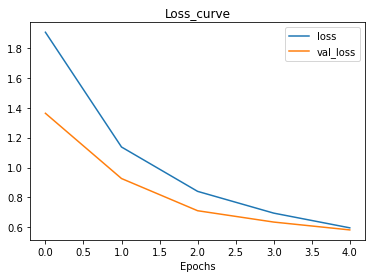

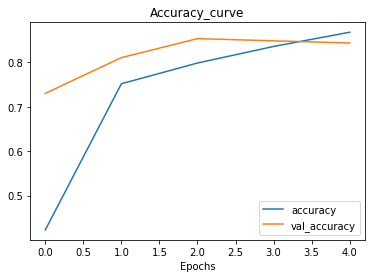

In [15]:
loss_accuracy_curve(history_0)

##Feature extraction with 1 percent of data-(with data augumentation)

In [16]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-02-12 15:28:24--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   204MB/s    in 0.6s    

2022-02-12 15:28:25 (204 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [17]:
#Unzipping the downloaded file
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_1_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [18]:
#Walk through the downloaded data
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_1_percent"):
  print(f'There are {len(dirnames)} directories in {len(filenames)} images in {dirpath}')

There are 2 directories in 0 images in 10_food_classes_1_percent
There are 10 directories in 0 images in 10_food_classes_1_percent/test
There are 0 directories in 250 images in 10_food_classes_1_percent/test/chicken_wings
There are 0 directories in 250 images in 10_food_classes_1_percent/test/pizza
There are 0 directories in 250 images in 10_food_classes_1_percent/test/steak
There are 0 directories in 250 images in 10_food_classes_1_percent/test/chicken_curry
There are 0 directories in 250 images in 10_food_classes_1_percent/test/ice_cream
There are 0 directories in 250 images in 10_food_classes_1_percent/test/ramen
There are 0 directories in 250 images in 10_food_classes_1_percent/test/fried_rice
There are 0 directories in 250 images in 10_food_classes_1_percent/test/hamburger
There are 0 directories in 250 images in 10_food_classes_1_percent/test/sushi
There are 0 directories in 250 images in 10_food_classes_1_percent/test/grilled_salmon
There are 10 directories in 0 images in 10_foo

From this we know that Only 1 percent data(7 images) we use than the original(750 images)

In [19]:
train_dir_1 = "10_food_classes_1_percent/train/"
test_dir_1 = "10_food_classes_1_percent/test/"

In [20]:
#Data Preparation

import tensorflow as tf

IMAGE_SIZE = (224, 224)

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory= train_dir_1,
                                                                           label_mode= "categorical",
                                                                           image_size= IMAGE_SIZE,
                                                                           batch_size= 32)

test_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir_1,
                                                                          label_mode= "categorical",
                                                                          image_size = IMAGE_SIZE,
                                                                          batch_size = 32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [21]:
train_data_1_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [22]:
#Data augumentation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

data_augumentation = keras.Sequential([
      preprocessing.RandomFlip("horizontal"),
      preprocessing.RandomRotation(0.2),
      preprocessing.RandomHeight(0.2),
      preprocessing.RandomWidth(0.2),
      preprocessing.RandomZoom(0.2)
      ], name = "data_augumentation")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 497.5, 544.5, -0.5)

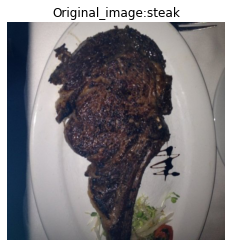

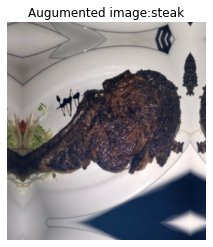

In [23]:
#Let's check the normal image and augumented image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os 
import random

target_class = random.choice(train_data_1_percent.class_names)
target_dir = train_dir + target_class

random_image = random.choice(os.listdir(target_dir))
random_image_path = target_dir+"/"+random_image
img = mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f'Original_image:{target_class}')
plt.axis(False);

#Augumented image
plt.figure()
aug_image = data_augumentation(tf.expand_dims(img, axis=0))
plt.imshow(tf.squeeze(aug_image)/225.)
plt.title(f'Augumented image:{target_class}')
plt.axis(False)

In [24]:
#Model building with 1 percent-data augumentation
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

inputs = layers.Input(shape=input_shape, name="input_layer")

x = data_augumentation(inputs)

x = base_model(x, training=False)
print(x.shape)

x = layers.GlobalAveragePooling2D(name="Global_average_pooling")(x)
print(x.shape)

output = layers.Dense(10, activation="softmax", name ="output_layer")(x)

model_1 = keras.Model(inputs, output)

model_1.compile(loss ="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

history_1 = model_1.fit(train_data_1_percent,
                        epochs=5,
                        steps_per_epoch =len(train_data_1_percent),
                        validation_data = test_data_1_percent,
                        validation_steps = int(0.25 *len(test_data_1_percent)),
                        callbacks = [call_back_tensorboard("transfer_learning", "1_percent_data_augumented")])


(None, None, None, 1280)
(None, 1280)
Saving the tensorboard call back into: transfer_learning/1_percent_data_augumented/20220212-152831
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


3/3 [==============================] - 16s 4s/step - loss: 2.4559 - accuracy: 0.0714 - val_loss: 2.3240 - val_accuracy: 0.1579
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.1969 - accuracy: 0.1857 - val_loss: 2.1986 - val_accuracy: 0.1990
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9928 - accuracy: 0.3143 - val_loss: 2.0788 - val_accuracy: 0.2763
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.7847 - accuracy: 0.5286 - val_loss: 1.9935 - val_accuracy: 0.3322
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.6958 - accuracy: 0.5857 - val_loss: 1.8896 - val_accuracy: 0.4079


In [25]:
model_1.evaluate(test_data_1_percent)

79/79 [==============================] - 11s 128ms/step - loss: 1.8810 - accuracy: 0.4008


[1.8810189962387085, 0.4007999897003174]

In [26]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augumentation (Sequent  (None, None, None, 3)    0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 Global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

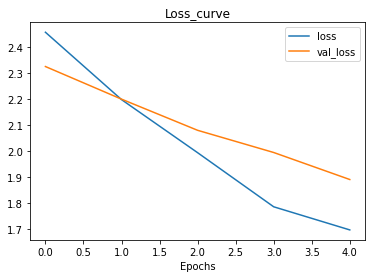

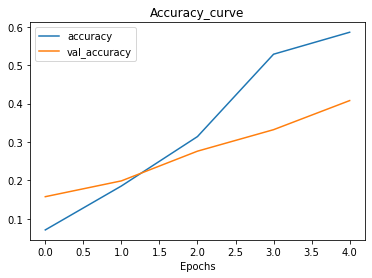

In [27]:
loss_accuracy_curve(history_1)

**Observation**
Model is improving if we train more epoch we get more accurate value

##Feature extraction of 10 percet of data with data augumentation

We are already downloaded the 10 percent and created test and train_dir but we are going to do that again

In [28]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()


--2022-02-12 15:29:29--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   157MB/s    in 1.0s    

2022-02-12 15:29:30 (157 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [29]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f'There are {len(dirnames)} directories in {len(filenames)} images in {dirpath}')

There are 2 directories in 0 images in 10_food_classes_10_percent
There are 10 directories in 0 images in 10_food_classes_10_percent/test
There are 0 directories in 250 images in 10_food_classes_10_percent/test/chicken_wings
There are 0 directories in 250 images in 10_food_classes_10_percent/test/pizza
There are 0 directories in 250 images in 10_food_classes_10_percent/test/steak
There are 0 directories in 250 images in 10_food_classes_10_percent/test/chicken_curry
There are 0 directories in 250 images in 10_food_classes_10_percent/test/ice_cream
There are 0 directories in 250 images in 10_food_classes_10_percent/test/ramen
There are 0 directories in 250 images in 10_food_classes_10_percent/test/fried_rice
There are 0 directories in 250 images in 10_food_classes_10_percent/test/hamburger
There are 0 directories in 250 images in 10_food_classes_10_percent/test/sushi
There are 0 directories in 250 images in 10_food_classes_10_percent/test/grilled_salmon
There are 10 directories in 0 imag

In [30]:
train_dir

'10_food_classes_10_percent/train/'

In [31]:
import tensorflow as tf
IMAGE_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            label_mode="categorical",
                                                                            image_size=IMAGE_SIZE,
                                                                            batch_size=32)
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           label_mode="categorical",
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [32]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


#Building data augumentation layer
data_augumentation = Sequential([
          preprocessing.RandomFlip("horizontal"),
          preprocessing.RandomRotation(0.2),
          preprocessing.RandomHeight(0.2),
          preprocessing.RandomWidth(0.2),
          preprocessing.RandomZoom(0.2)
          ], name = "data_augumentation")

#Setting a input shape
input_shape = (224, 224, 3)

#Modeling
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(input_shape, name="input_layers")

x = data_augumentation(inputs)
x = base_model(x, training = False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)

output = layers.Dense(10, activation="softmax", name="output_layer" )(x)

model_2 = tf.keras.Model(inputs, output)

model_2.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [33]:
#Creating a checkpoint for 5 epoch to know how good our model is performing
checkpoint_path = "10_percent_model_checkpoint/checkpoint.ckpt"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_best_only=False,
                                                         save_weights_only=True,
                                                         save_freq='epoch',
                                                         verbose=1)


In [34]:
#Now we are going to fit the model
initial_epochs = 5

history_2 = model_2.fit(train_data_10_percent,
                        epochs=initial_epochs,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data_10_percent,
                        validation_steps = int(0.25 * len(test_data_10_percent)),
                        callbacks = [call_back_tensorboard("transfer_learning", "10_percent_data_aug"),
                                     checkpoint_callback])

Saving the tensorboard call back into: transfer_learning/10_percent_data_aug/20220212-152937
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - ETA: 0s - loss: 2.0346 - accuracy: 0.3267
Epoch 00001: saving model to 10_percent_model_checkpoint/checkpoint.ckpt
24/24 [==============================] - 24s 700ms/step - loss: 2.0346 - accuracy: 0.3267 - val_loss: 1.4742 - val_accuracy: 0.6661
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3559 - accuracy: 0.6760
Epoch 00002: saving model to 10_percent_model_checkpoint/checkpoint.ckpt
24/24 [==============================] - 17s 690ms/step - loss: 1.3559 - accuracy: 0.6760 - val_loss: 1.0263 - val_accuracy: 0.7780
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0581 - accuracy: 0.7413
Epoch 00003: saving model to 10_percent_model_checkpoint/checkpoint.ckpt
24/24 [==============================] - 14s 566ms/step - loss: 1.0581 - accuracy: 0.7413 - val_loss: 0.8513 - val_accuracy: 0.8158
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.9040 - accuracy: 0.7733
Epoch 00004: saving mod

In [35]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 11s 129ms/step - loss: 0.6875 - accuracy: 0.8192


[0.6874608397483826, 0.8191999793052673]

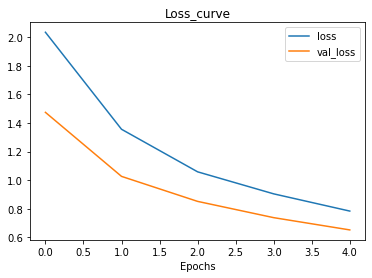

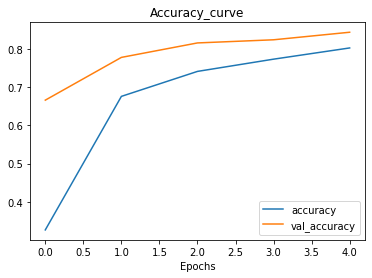

In [36]:
loss_accuracy_curve(history_2)

In [37]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (InputLayer)   [(None, 224, 224, 3)]     0         
                                                                 
 data_augumentation (Sequent  (None, None, None, 3)    0         
 ial)                                                            
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling (Glo  (None, 1280)             0         
 balAveragePooling2D)                                            
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [38]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [39]:
#Let's freeze some of the layer and check the model performance
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

In [40]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name,layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [41]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [42]:
print(len(model_2.trainable_variables))

12


In [43]:
#Finetune_model
finetune_epochs = initial_epochs+5

history_finetune_10_percent = model_2.fit(train_data_10_percent,
                                          epochs =finetune_epochs,
                                          steps_per_epoch = len(train_data_10_percent),
                                          initial_epoch = history_2.epoch[-1],
                                          validation_data = test_data_10_percent,
                                          validation_steps = int(0.25*len(test_data_10_percent)),
                                          callbacks = [call_back_tensorboard("transfer_learning", "fine_tuned_10_aug")])


Saving the tensorboard call back into: transfer_learning/fine_tuned_10_aug/20220212-153133


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 5/10
24/24 [==============================] - 25s 660ms/step - loss: 0.6797 - accuracy: 0.8000 - val_loss: 0.5652 - val_accuracy: 0.8240
Epoch 6/10
24/24 [==============================] - 15s 622ms/step - loss: 0.5473 - accuracy: 0.8360 - val_loss: 0.4925 - val_accuracy: 0.8536
Epoch 7/10
24/24 [==============================] - 15s 612ms/step - loss: 0.4996 - accuracy: 0.8467 - val_loss: 0.4780 - val_accuracy: 0.8470
Epoch 8/10
24/24 [==============================] - 14s 554ms/step - loss: 0.4507 - accuracy: 0.8560 - val_loss: 0.4848 - val_accuracy: 0.8503
Epoch 9/10
24/24 [==============================] - 14s 587ms/step - loss: 0.4067 - accuracy: 0.8733 - val_loss: 0.4864 - val_accuracy: 0.8470
Epoch 10/10
24/24 [==============================] - 12s 490ms/step - loss: 0.3635 - accuracy: 0.8960 - val_loss: 0.5041 - val_accuracy: 0.8503


In [44]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 11s 128ms/step - loss: 0.4938 - accuracy: 0.8384


[0.49379244446754456, 0.8384000062942505]

In [45]:
def compare_history(original_history, new_history, initial_epochs=5):

  acc = original_history.history["accuracy"]
  loss = original_history.history["loss"]

  print(len(acc))

  val_loss = original_history.history["val_loss"]
  val_accuracy = original_history.history["val_accuracy"]

  #Combine a original history with new history
  total_acc = acc + new_history.history["accuracy"]
  total_loss = loss + new_history.history["loss"]

  print(len(total_acc))

  total_val_loss = val_loss + new_history.history["val_loss"]
  total_val_accuracy = val_accuracy + new_history.history["val_accuracy"]

  print(total_acc)

  #Plot making
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1 ,1)
  plt.plot(total_acc, label = "Training_accuracy")
  plt.plot(total_val_accuracy, label = "validation_accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1],
           plt.ylim(), label= "Start finetuning")
  plt.legend()
  plt.title("Training and validation accuracy")

  plt.subplot(2, 1 ,2)
  plt.plot(total_loss, label = "Training_loss")
  plt.plot(total_val_loss, label = "validation_loss")
  plt.plot([initial_epochs-1, initial_epochs-1],
           plt.ylim(), label = "start finetuning")
  plt.legend()
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.show()

5
11
[0.3266666531562805, 0.6759999990463257, 0.7413333058357239, 0.7733333110809326, 0.8026666641235352, 0.800000011920929, 0.8360000252723694, 0.846666693687439, 0.8560000061988831, 0.8733333349227905, 0.8960000276565552]


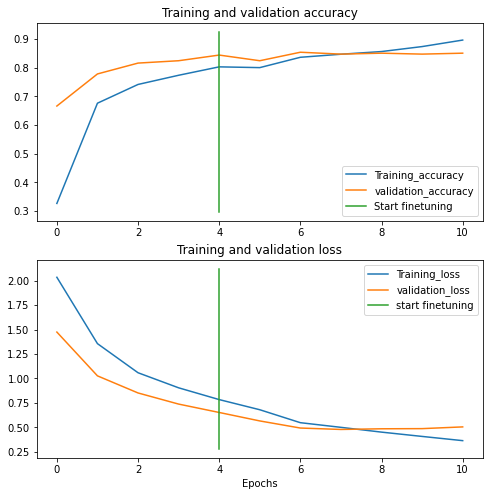

In [46]:
compare_history(original_history=history_2, 
                 new_history=history_finetune_10_percent, 
                 initial_epochs=5)

In [47]:
!wget wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2022-02-12 15:33:37--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2022-02-12 15:33:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  94.5MB/s    in 6.5s    

2022-02-12 15:33:44 (75.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]

FINISHED --2022-02-12 15:33:44--
Total wall clock time: 7.1s
Downloaded: 1 files, 495M in 6.5s (75.7 MB/s)


In [48]:
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [49]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [51]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f'There are {len(dirnames)} in {len(filenames)} images in {dirpath}')

There are 2 in 0 images in 10_food_classes_all_data
There are 10 in 0 images in 10_food_classes_all_data/test
There are 0 in 250 images in 10_food_classes_all_data/test/chicken_wings
There are 0 in 250 images in 10_food_classes_all_data/test/pizza
There are 0 in 250 images in 10_food_classes_all_data/test/steak
There are 0 in 250 images in 10_food_classes_all_data/test/chicken_curry
There are 0 in 250 images in 10_food_classes_all_data/test/ice_cream
There are 0 in 250 images in 10_food_classes_all_data/test/ramen
There are 0 in 250 images in 10_food_classes_all_data/test/fried_rice
There are 0 in 250 images in 10_food_classes_all_data/test/hamburger
There are 0 in 250 images in 10_food_classes_all_data/test/sushi
There are 0 in 250 images in 10_food_classes_all_data/test/grilled_salmon
There are 10 in 0 images in 10_food_classes_all_data/train
There are 0 in 750 images in 10_food_classes_all_data/train/chicken_wings
There are 0 in 750 images in 10_food_classes_all_data/train/pizza
The

In [53]:
import tensorflow as tf
IMAGE_SIZE = (224, 224)

train_data_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir, 
                                                                      label_mode="categorical",
                                                                      image_size=IMAGE_SIZE)

test_data_full = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                     label_mode = "categorical",
                                                                     image_size =IMAGE_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [55]:
model_2.evaluate(test_data_10_percent)

79/79 [==============================] - 12s 144ms/step - loss: 0.4938 - accuracy: 0.8384


[0.49379247426986694, 0.8384000062942505]

In [56]:
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layers True
1 data_augumentation True
2 efficientnetb0 True
3 global_average_pooling True
4 output_layer True


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

In [61]:
model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [65]:
from gc import callbacks
fine_tune_epochs = initial_epochs+5

history_finetune_full = model_2.fit(train_data_full,
                                    epochs = fine_tune_epochs,
                                    steps_per_epoch = len(train_data_full),
                                    initial_epoch = history_2.epoch[-1],
                                    validation_data = test_data_full,
                                    validation_steps = int(0.25*len(test_data_full)),
                                    callbacks =  [call_back_tensorboard("transfer_learning", "finetune_full")])

Saving the tensorboard call back into: transfer_learning/finetune_full/20220212-162617


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


Epoch 5/10
235/235 [==============================] - 89s 344ms/step - loss: 0.6627 - accuracy: 0.7869 - val_loss: 0.3806 - val_accuracy: 0.8832
Epoch 6/10
235/235 [==============================] - 72s 303ms/step - loss: 0.5578 - accuracy: 0.8237 - val_loss: 0.3637 - val_accuracy: 0.8766
Epoch 7/10
235/235 [==============================] - 65s 274ms/step - loss: 0.5068 - accuracy: 0.8379 - val_loss: 0.3481 - val_accuracy: 0.8964
Epoch 8/10
235/235 [==============================] - 66s 275ms/step - loss: 0.4668 - accuracy: 0.8520 - val_loss: 0.3482 - val_accuracy: 0.8865
Epoch 9/10
235/235 [==============================] - 61s 257ms/step - loss: 0.4408 - accuracy: 0.8607 - val_loss: 0.3600 - val_accuracy: 0.8717
Epoch 10/10
235/235 [==============================] - 60s 255ms/step - loss: 0.3952 - accuracy: 0.8695 - val_loss: 0.3440 - val_accuracy: 0.8997


In [66]:
model_2.evaluate(test_data_full)

79/79 [==============================] - 12s 139ms/step - loss: 0.3520 - accuracy: 0.8844


[0.3519628942012787, 0.8844000101089478]

5
11
[0.3266666531562805, 0.6759999990463257, 0.7413333058357239, 0.7733333110809326, 0.8026666641235352, 0.7869333624839783, 0.8237333297729492, 0.8378666639328003, 0.8519999980926514, 0.8606666922569275, 0.8694666624069214]


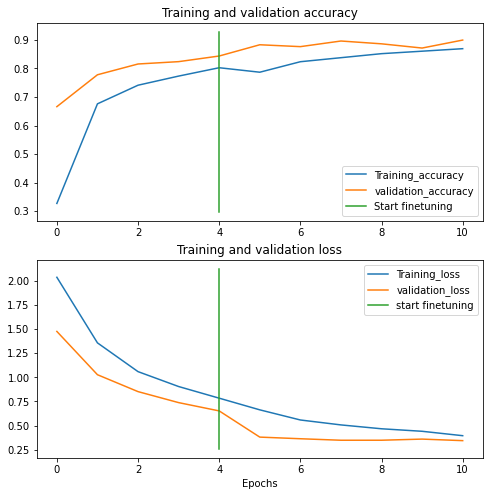

In [70]:
compare_history(original_history = history_2,
                new_history=history_finetune_full,
                initial_epochs = 5)

In [72]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments"\
  --description "Different Transfer learning Technique"\
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./transfer_learning

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=FEpNyJj8hgMJa1reuUu33FKuuFmyij&prompt=consent&access_type=o

In [73]:
!tensorboard dev list

https://tensorboard.dev/experiment/Vh5HMQblR3qB7BBypYiBxw/
	Name                 Transfer learning experiments
	Description          Different Transfer learning Technique
	Id                   Vh5HMQblR3qB7BBypYiBxw
	Created              2022-02-12 16:49:20 (1 minute ago)
	Updated              2022-02-12 16:49:29 (1 minute ago)
	Runs                 10
	Tags                 5
	Scalars              162
	Tensor bytes         0
	Binary object bytes  4153224
Total: 1 experiment(s)


In [75]:
!tensorboard dev delete --experiment_id Vh5HMQblR3qB7BBypYiBxw

Deleted experiment Vh5HMQblR3qB7BBypYiBxw.


In [77]:
!tensorboard dev list


No experiments. Use `tensorboard dev upload` to get started.
